A. 데이터 전처리 - 데이터 읽어오기

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

csv_path = "NFLX.csv"
df = pd.read_csv(csv_path, usecols=range(0, 5))
df

,Date,Open,High,Low,Close
0,2018-02-05,262.000000,267.899994,250.029999,254.259995
1,2018-02-06,247.699997,266.700012,245.000000,265.720001
2,2018-02-07,266.579987,272.450012,264.329987,264.559998
3,2018-02-08,267.079987,267.619995,250.000000,250.100006
4,2018-02-09,253.850006,255.800003,236.110001,249.470001
...,...,...,...,...,...
1004,2022-01-31,401.970001,427.700012,398.200012,427.140015
1005,2022-02-01,432.959991,458.480011,425.540009,457.130005
1006,2022-02-02,448.250000,451.980011,426.480011,429.480011
1007,2022-02-03,421.440002,429.260010,404.279999,405.600006


In [ ]:
B. 데이터 전처리 - 2021년 이후의 종가 데이터 출력하기

<function matplotlib.pyplot.show(close=None, block=None)>

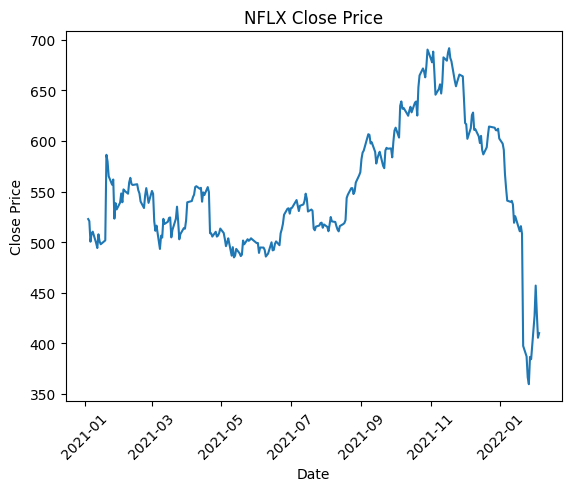

In [21]:
df['Date'] = pd.to_datetime(df['Date'])
new_df = df[df['Date'] >= "2021-01-01"]

plt.plot(new_df['Date'],new_df['Close'])
plt.title('NFLX Close Price')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.xticks(rotation = 45)

plt.show

C. 데이터 분석 - 2021년 이후 최고, 최저 종가 출력하기

In [38]:
max_price = new_df['Close'].max()
min_price = new_df['Close'].min()
print(f'최고 종가:', max_price)
print(f'최저 종가:', min_price)


최고 종가: 691.690002
최저 종가: 359.700012


D. 데이터 분석 - 2021년 이후 월 별 평균 종가 출력하기

<function matplotlib.pyplot.show(close=None, block=None)>

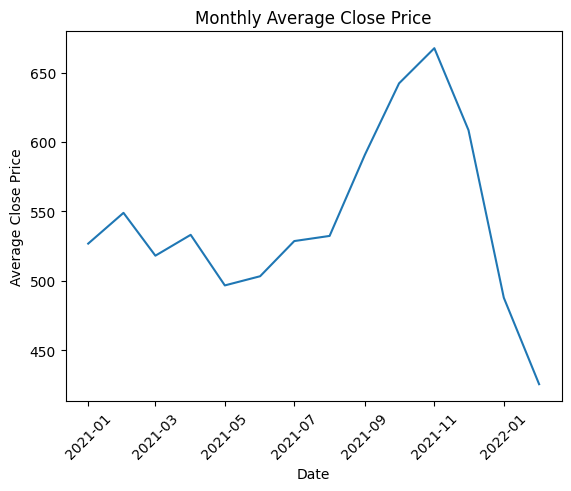

In [66]:
#월별 종가 계산
monthly_avg_close = new_df.groupby((new_df['Date']).dt.to_period('M')).mean(numeric_only=True)
#행이 변경되었으므로, 다시 변경
monthly_avg_close.reset_index(inplace=True)
# 'Date'를 datetime 형식으로 변환
monthly_avg_close['Date'] = monthly_avg_close['Date'].dt.to_timestamp()
monthly_avg_close 

plt.plot(monthly_avg_close['Date'], monthly_avg_close['Close'])
plt.title('Monthly Average Close Price')
plt.xlabel('Date')
plt.ylabel('Average Close Price')
plt.xticks(rotation = 45)

plt.show

In [ ]:
df['Date'] = pd.to_datetime(df['Date'])
df = 